In [ ]:
from util import get_image_by_index, decode_class
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.initializers import VarianceScaling

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [ ]:
# Load the .npz file
data = np.load('dataset_features.npz')

# List all arrays within the .npz file
print(data.files)

# Access individual arrays by their names
X_train = data['trainset_features']
y_train = data['trainset_labels']

X_val = data['validset_features']
y_val = data['validset_labels']

X_test = data['testset_features']
y_test = data['testset_labels']

class_labels = data['class_labels']

['trainset_features', 'validset_features', 'testset_features', 'trainset_labels', 'validset_labels', 'testset_labels', 'class_labels']


# 1-layer model

In [106]:
model_1layer = Sequential()
model_1layer.add(Dense(6, activation="softmax", input_dim=X_train.shape[1],
                kernel_initializer=VarianceScaling(scale=1.0, seed=0)))
model_1layer.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 6)                 7686      
Total params: 7,686
Trainable params: 7,686
Non-trainable params: 0
_________________________________________________________________


In [110]:
# Define loss function, optimizer and metrics to track during training
model_1layer.compile(optimizer="sgd",
              loss="categorical_crossentropy",
              metrics=["acc"])

Data preparation

In [86]:
X_crossval = np.concatenate((X_train, X_val), axis=0)
y_crossval = np.concatenate((y_train, y_val), axis=0)

In [ ]:
# Rescale train and validation data
scaler = StandardScaler()
X_crossval_preprocessed = scaler.fit_transform(X_crossval)
X_test_preprocessed = scaler.transform(X_test)

Training

In [88]:
# Fit model
history = model_1layer.fit(
    x=X_crossval_preprocessed,
    y=y_crossval,
    validation_split=0.2,
    batch_size=32,
    epochs=25,
    shuffle=True,  # Shuffle training samples
)

Epoch 1/25
11/11 [==============================] - 0s 10ms/step - loss: 1.0849 - acc: 0.6090 - val_loss: 0.8148 - val_acc: 0.7024
Epoch 2/25
11/11 [==============================] - 0s 3ms/step - loss: 0.3714 - acc: 0.8955 - val_loss: 0.6162 - val_acc: 0.8214
Epoch 3/25
11/11 [==============================] - 0s 3ms/step - loss: 0.2379 - acc: 0.9373 - val_loss: 0.5419 - val_acc: 0.8214
Epoch 4/25
11/11 [==============================] - 0s 3ms/step - loss: 0.1742 - acc: 0.9672 - val_loss: 0.5043 - val_acc: 0.8452
Epoch 5/25
11/11 [==============================] - 0s 3ms/step - loss: 0.1377 - acc: 0.9821 - val_loss: 0.4787 - val_acc: 0.8571
Epoch 6/25
11/11 [==============================] - 0s 3ms/step - loss: 0.1142 - acc: 0.9851 - val_loss: 0.4648 - val_acc: 0.8571
Epoch 7/25
11/11 [==============================] - 0s 3ms/step - loss: 0.0966 - acc: 0.9910 - val_loss: 0.4560 - val_acc: 0.8571
Epoch 8/25
11/11 [==============================] - 0s 3ms/step - loss: 0.0836 - acc: 0.9

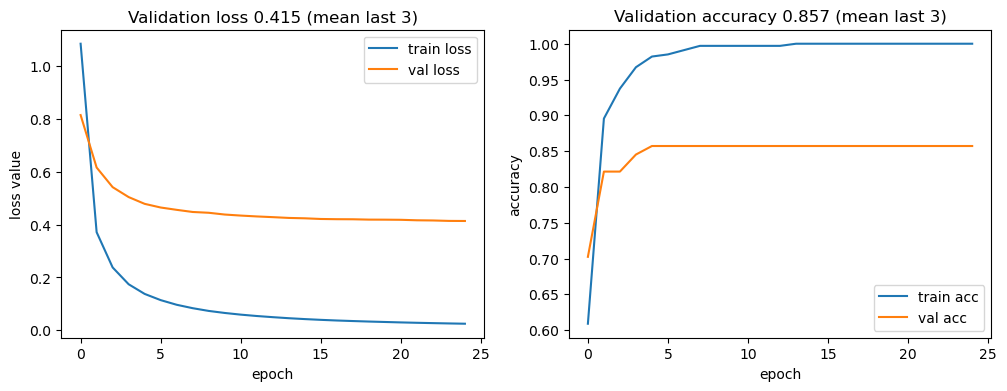

In [ ]:
# Create two plots: one for the loss value, one for the accuracy
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot accuracy values
ax1.plot(history.history["loss"], label="train loss")
ax1.plot(history.history["val_loss"], label="val loss")
ax1.set_title(
    "Validation loss {:.3f} (mean last 3)".format(
        np.mean(history.history["val_loss"][-3:])  # last three values
    )
)
ax1.set_xlabel("epoch")
ax1.set_ylabel("loss value")
ax1.legend()

# Plot accuracy values
ax2.plot(history.history["acc"], label="train acc")
ax2.plot(history.history["val_acc"], label="val acc")
ax2.set_title(
    "Validation accuracy {:.3f} (mean last 3)".format(
        np.mean(history.history["val_acc"][-3:])  # last three values
    )
)
ax2.set_xlabel("epoch")
ax2.set_ylabel("accuracy")
ax2.legend()
plt.show()

In [102]:
print('Model Accuracy:')
loss, accuracy = model_1layer.evaluate(X_train, y_train, verbose=0)
print(f'On train set: {accuracy:.3f}')
loss, accuracy = model_1layer.evaluate(X_val, y_val, verbose=0)
print(f'On valid set: {accuracy:.3f}')
loss, accuracy = model_1layer.evaluate(X_test, y_test, verbose=0)
print(f'On test  set: {accuracy:.3f}')

Model Accuracy:
On train set: 0.996
On valid set: 0.899
On test  set: 0.880


# 2-layer model

In [103]:
X_train.shape

(280, 1280)

In [ ]:
model_2layer = Sequential()
model_2layer.add(Dense(10, activation="relu", input_dim=X_train.shape[1],
                kernel_initializer=VarianceScaling(scale=2.0, seed=0)))
model_2layer.add(Dense(6, activation="softmax", 
                kernel_initializer=VarianceScaling(scale=1.0, seed=0)))
model_2layer.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 10)                12810     
_________________________________________________________________
dense_25 (Dense)             (None, 6)                 66        
Total params: 12,876
Trainable params: 12,876
Non-trainable params: 0
_________________________________________________________________


In [91]:
from tensorflow.keras import optimizers

# Define loss function, optimizer and metrics to track during training
model_2layer.compile(optimizer="sgd",
                     loss="categorical_crossentropy",
                     metrics=["acc"])

In [ ]:
# Fit model
history = model_2layer.fit(x=X_crossval_preprocessed,
                           y=y_crossval,
                           validation_split=0.2,
                           batch_size=32,
                           epochs=25,
                           shuffle=True,  # Shuffle training samples
)

Epoch 1/25
11/11 [==============================] - 0s 11ms/step - loss: 1.8295 - acc: 0.3194 - val_loss: 1.4024 - val_acc: 0.5357
Epoch 2/25
11/11 [==============================] - 0s 4ms/step - loss: 1.0384 - acc: 0.7134 - val_loss: 1.1256 - val_acc: 0.6190
Epoch 3/25
11/11 [==============================] - 0s 3ms/step - loss: 0.7165 - acc: 0.8030 - val_loss: 0.9749 - val_acc: 0.6905
Epoch 4/25
11/11 [==============================] - 0s 3ms/step - loss: 0.5574 - acc: 0.8597 - val_loss: 0.8837 - val_acc: 0.7024
Epoch 5/25
11/11 [==============================] - 0s 3ms/step - loss: 0.4653 - acc: 0.8716 - val_loss: 0.8220 - val_acc: 0.7024
Epoch 6/25
11/11 [==============================] - 0s 3ms/step - loss: 0.4050 - acc: 0.8925 - val_loss: 0.7770 - val_acc: 0.7262
Epoch 7/25
11/11 [==============================] - 0s 3ms/step - loss: 0.3589 - acc: 0.9134 - val_loss: 0.7351 - val_acc: 0.7262
Epoch 8/25
11/11 [==============================] - 0s 3ms/step - loss: 0.3242 - acc: 0.9

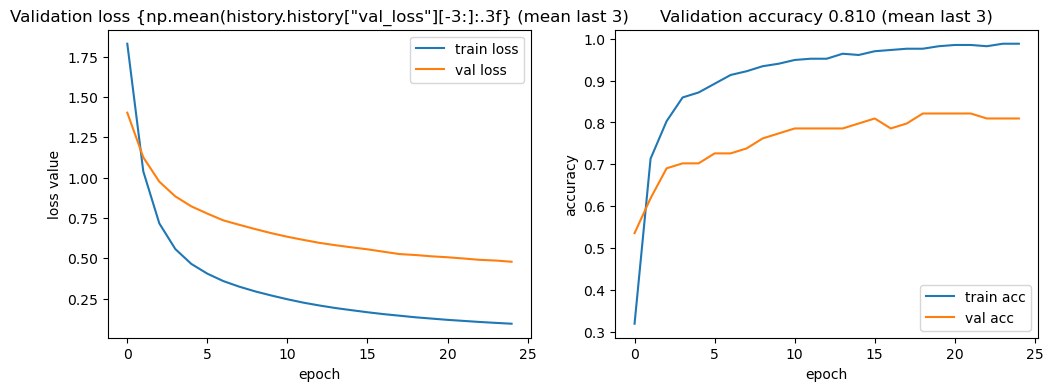

In [93]:
import matplotlib.pyplot as plt
import numpy as np

# Create two plots: one for the loss value, one for the accuracy
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot accuracy values
ax1.plot(history.history["loss"], label="train loss")
ax1.plot(history.history["val_loss"], label="val loss")
ax1.set_title('Validation loss {np.mean(history.history["val_loss"][-3:]:.3f} (mean last 3)')
ax1.set_xlabel("epoch")
ax1.set_ylabel("loss value")
ax1.legend()

# Plot accuracy values
ax2.plot(history.history["acc"], label="train acc")
ax2.plot(history.history["val_acc"], label="val acc")
ax2.set_title(f'Validation accuracy {np.mean(history.history["val_acc"][-3:]):.3f} (mean last 3)')
ax2.set_xlabel("epoch")
ax2.set_ylabel("accuracy")
ax2.legend()
plt.show()

In [100]:
print('Model Accuracy:')
loss, accuracy = model_2layer.evaluate(X_train, y_train, verbose=0)
print(f'On train set: {accuracy:.3f}')
loss, accuracy = model_2layer.evaluate(X_val, y_val, verbose=0)
print(f'On valid set: {accuracy:.3f}')
loss, accuracy = model_2layer.evaluate(X_test, y_test, verbose=0)
print(f'On test  set: {accuracy:.3f}')

Model Accuracy:
On train set: 0.975
On valid set: 0.899
On test  set: 0.860
